<a href="https://colab.research.google.com/github/adarshanand2327/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

0it [00:00, ?it/s]

26427392it [00:01, 14580912.01it/s]                              


Extracting fashion_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 100067.02it/s]                           
0it [00:00, ?it/s]

Extracting fashion_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4386151.53it/s]                            
0it [00:00, ?it/s]

Extracting fashion_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 35742.88it/s]            


Extracting fashion_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
tensor(2)


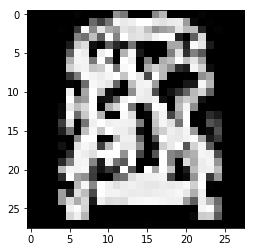

In [2]:
#importing the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.FashionMNIST("fashion_MNIST", train = True, transform=transform, download = True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

testset = datasets.FashionMNIST("fashion_MNIST", train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle = True)

dataIter = iter(trainloader)
images, labels = dataIter.next()
plt.imshow(images[0].numpy().squeeze(), cmap = 'Greys_r')
print(labels[0])

In [0]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
#defining the architecture
class classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    self.dropout = nn.Dropout(p=0.2)
  def forward(self, x):
   
    x = self.dropout(F.relu(self.hidden1(x)))
    x = self.dropout(F.relu(self.hidden2(x)))
    x = self.dropout(F.relu(self.hidden3(x)))
    x = F.log_softmax(self.output(x), dim=1)
    
    return x

In [0]:
model = classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
model

classifier(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [6]:
#Training
epochs = 20
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    prediction = model(images)
    optimizer.zero_grad()
    loss = criterion(prediction, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  print(f"Training loss:  {running_loss/len(trainloader)}")
  correct = 0
  total = 0
  #testing
  with torch.no_grad():
    for images, labels in testloader:
      images = images.view(images.shape[0], -1)
      outputs = model(images)
      _, pred = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    print('Accuracy:', correct/total)

Training loss:  0.6020395472677532
Accuracy: 0.8138
Training loss:  0.4795336050551329
Accuracy: 0.8254
Training loss:  0.4487933322691968
Accuracy: 0.8327
Training loss:  0.4327408466289547
Accuracy: 0.8431
Training loss:  0.41702215594332864
Accuracy: 0.8385
Training loss:  0.41376257106375847
Accuracy: 0.842
Training loss:  0.40414835628606616
Accuracy: 0.8324
Training loss:  0.3960678102746447
Accuracy: 0.8514
Training loss:  0.3898458478293185
Accuracy: 0.8459
Training loss:  0.3884962426383358
Accuracy: 0.8469
Training loss:  0.3850099197439929
Accuracy: 0.8475
Training loss:  0.3783735146781783
Accuracy: 0.843
Training loss:  0.37708085882606535
Accuracy: 0.848
Training loss:  0.37684635785438103
Accuracy: 0.8484
Training loss:  0.37654402080788285
Accuracy: 0.8567
Training loss:  0.3651163431563611
Accuracy: 0.8497
Training loss:  0.3718506578109793
Accuracy: 0.8486
Training loss:  0.3671393369846761
Accuracy: 0.8509
Training loss:  0.3661552422733576
Accuracy: 0.8576
Training 

In [7]:
#saving the model
checkpoint = {'input_size': 784,
              'output_size': 10,
            'hidden_layers': [each.out_features for each in model.hidden_layers],
            'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')            

AttributeError: ignored